# FastAi. Collaborative filtering 
Note: This is to run on colab
## Load data 

In [1]:
!wget https://www.dropbox.com/s/nh7h0bfyg3fquav/ratings.txt?dl=0 -O /content/ratings.txt

--2021-08-30 12:42:00--  https://www.dropbox.com/s/nh7h0bfyg3fquav/ratings.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nh7h0bfyg3fquav/ratings.txt [following]
--2021-08-30 12:42:00--  https://www.dropbox.com/s/raw/nh7h0bfyg3fquav/ratings.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc142bfa41043e39fd41c3bbaa73.dl.dropboxusercontent.com/cd/0/inline/BVOkFt9Ut6BFEnhGZfc284PJGlWeMGngfn8a0uxTZanRDPU-MLuNScJaUQCd289yAsEN6AD1-WT-JLdqWTdBTvVbItqyNCqxhlySDHEp7HV-u8cUSaTbVh02u1zrAgDZ82GbAg1yPpIesVy_1VgxkYPP/file# [following]
--2021-08-30 12:42:00--  https://uc142bfa41043e39fd41c3bbaa73.dl.dropboxusercontent.com/cd/0/inline/BVOkFt9Ut6BFEnhGZfc284PJGlWeMGngfn8a0uxTZanRDPU-MLuNScJaUQCd289yAsEN6AD1-WT-JLdqWTdBTvVb

In [2]:
from fastai.collab import *

# specify path
# path = Path('/content')
path = Path('/')
print(path.ls())



# load in ratings data
# ratings = pd.read_csv(path/'ratings.csv')
df_ratings = pd.read_csv ('/content/ratings.txt',sep= ' ',names= ['uid', 'iid', 'rating'])


print(df_ratings.head())

# # load in book information data
# books = pd.read_csv(path/'books.csv')
# books.head()


[PosixPath('/media'), PosixPath('/lib64'), PosixPath('/boot'), PosixPath('/dev'), PosixPath('/sys'), PosixPath('/home'), PosixPath('/srv'), PosixPath('/tmp'), PosixPath('/mnt'), PosixPath('/usr'), PosixPath('/bin'), PosixPath('/etc'), PosixPath('/root'), PosixPath('/sbin'), PosixPath('/opt'), PosixPath('/var'), PosixPath('/proc'), PosixPath('/lib'), PosixPath('/run'), PosixPath('/content'), PosixPath('/.dockerenv'), PosixPath('/datalab'), PosixPath('/tools'), PosixPath('/tensorflow-1.15.2'), PosixPath('/lib32')]
   uid  iid  rating
0    1    1     2.0
1    1    2     4.0
2    1    3     3.5
3    1    4     3.0
4    1    5     4.0


## Create DataBunch




In [3]:
data = CollabDataBunch.from_df(df_ratings, seed=42, valid_pct=0.1, 
                               user_name='uid', 
                               item_name='iid',
                               rating_name='rating')
data.show_batch(10)

uid,iid,target
147,236,4.0
1003,249,2.5
670,1414,2.5
136,620,4.0
984,207,4.0
442,255,3.0
159,12,1.0
115,212,3.5
1153,205,1.5
312,17,2.5


In [ ]:
# Note: It splits the data to train and valid 
data

TabularDataBunch;

Train: LabelList (31948 items)
x: CollabList
uid 1; iid 1; ,uid 1; iid 2; ,uid 1; iid 3; ,uid 1; iid 4; ,uid 1; iid 6; 
y: FloatList
2.0,4.0,3.5,3.0,3.5
Path: .;

Valid: LabelList (3549 items)
x: CollabList
uid 471; iid 6; ,uid 1034; iid 903; ,uid 1249; iid 257; ,uid 515; iid 1; ,uid 1282; iid 9; 
y: FloatList
3.5,3.0,3.0,4.0,4.0
Path: .;

Test: None

## Create  Learner instance 

In [4]:
df_ratings.rating.min(), df_ratings.rating.max()

(0.5, 4.0)

In [6]:
learn = collab_learner(data, n_factors=40, y_range=(0.5, 4.0), wd=1e-1)

## Determine the best learning rate 

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


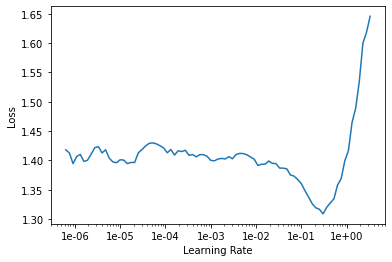

In [7]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

#### The local minimum on the plot is the best lr . Currently it is lr= 1e0 

# Run the traing for 5 epochs

In [8]:
learn.fit_one_cycle(5, 1) # epoch = 5 lr =  1e0

epoch,train_loss,valid_loss,time
0,2.591237,2.580037,00:05
1,2.622185,2.514935,00:05
2,2.532372,2.505999,00:05
3,1.863654,1.723462,00:05
4,0.739340,0.759699,00:06


## Save and load model

For demo purpose 

In [ ]:
learn.save('good_movies')

In [ ]:
# load in EmbeddingDotBias model
learn = collab_learner(data, n_factors=40, y_range=(0.5, 4.0), wd=1e-1, model_dir="/content/models/", path="/conent/")
learn.load('good_movies');


## Predict 

Foe demo purpose lets use the first 64 of valid data 
Note: 

In [9]:
(uids, iids), ratings =  next(iter(data.valid_dl))

In [10]:
uids

tensor([ 468, 1026, 1239,  511, 1272,   37,  406, 1411,  786, 1030,  564,  259,
         150,  197,  266,  372,  871, 1438,  269,  671, 1434,  332,  840,   79,
         627,  993, 1102,  511, 1177,  448,   46,  322, 1330,  787,  553,  296,
         282,  522, 1373,  533,  645,  305,  324, 1257,  408,  993, 1014, 1276,
         619,  860,  320,   67,  855, 1484, 1132, 1228, 1203,  160,  754,  536,
         107,  835, 1086,  426], device='cuda:0')

In [11]:
iids

tensor([  6, 892, 255,   1,   9,   3, 205, 231, 208,   7,   6,   3, 205, 685,
        371,  17, 119,   7, 762,   4, 254,  11, 722, 437, 243,   7, 577,  12,
        934, 250,   5,   2, 215, 252, 233, 209,   4, 119, 208,   9, 205, 429,
        239,   7, 205, 204, 249, 211, 237, 241, 507,   9,   5, 251, 231, 252,
         17, 676, 237, 234, 208, 244, 237, 233], device='cuda:0')

In [12]:
ratings

tensor([3.5000, 3.0000, 3.0000, 4.0000, 4.0000, 4.0000, 2.5000, 0.5000, 4.0000,
        3.5000, 3.5000, 3.0000, 4.0000, 0.5000, 3.5000, 1.5000, 4.0000, 0.5000,
        2.5000, 4.0000, 3.0000, 3.5000, 4.0000, 3.5000, 3.5000, 4.0000, 4.0000,
        3.0000, 2.0000, 3.0000, 3.5000, 4.0000, 3.5000, 3.0000, 4.0000, 4.0000,
        4.0000, 0.5000, 4.0000, 4.0000, 3.0000, 1.0000, 2.0000, 4.0000, 3.5000,
        3.0000, 3.5000, 3.0000, 4.0000, 4.0000, 3.0000, 4.0000, 4.0000, 1.0000,
        4.0000, 4.0000, 2.5000, 3.0000, 2.0000, 3.0000, 4.0000, 4.0000, 4.0000,
        3.5000], device='cuda:0')

In [13]:
preds= learn.model(uids, iids)
preds

tensor([2.4740, 3.4829, 2.9060, 3.0921, 3.3950, 3.6636, 2.2094, 2.4784, 3.5013,
        2.1788, 2.7002, 3.2678, 2.7228, 1.1071, 2.0029, 2.3403, 2.6461, 3.1985,
        2.5819, 3.4032, 3.2031, 3.7345, 3.0177, 2.0181, 3.4138, 2.7146, 2.0453,
        3.2858, 2.4155, 2.8906, 3.5763, 3.5789, 3.3072, 2.9669, 2.4344, 3.7178,
        3.6344, 2.2896, 2.2220, 3.3874, 2.5595, 3.6800, 2.8599, 2.7261, 2.9099,
        2.1736, 3.2115, 3.4403, 3.4738, 2.1509, 2.3664, 3.4985, 3.5969, 2.6609,
        2.8354, 3.2152, 2.9528, 2.7030, 3.2641, 3.5772, 3.4490, 3.5327, 3.0926,
        2.8147], device='cuda:0', grad_fn=<AddBackward0>)

In [14]:
print ('{}'.format(preds[0]))

2.4739880561828613


## Evaluate FastaAI model 

In [15]:
from sklearn.model_selection import train_test_split 
df_train, df_test= train_test_split (df_ratings, test_size = 1024)
df_train.shape,df_test.shape

((34473, 3), (1024, 3))

In [ ]:
df_train.rating.min(), df_train.rating.max(), df_test.rating.min(), df_test.rating.max()

(0.5, 4.0, 0.5, 4.0)

In [17]:
data_train = CollabDataBunch.from_df(df_train, seed=42, valid_pct=0, 
                               user_name='uid', 
                               item_name='iid',
                               rating_name='rating')
data_train.show_batch(15)

uid,iid,target
402,1248,1.5
1002,522,2.5
1050,255,3.0
548,5,1.0
1366,5,2.0
223,236,4.0
826,210,4.0
225,250,4.0
1236,255,2.5
428,207,3.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


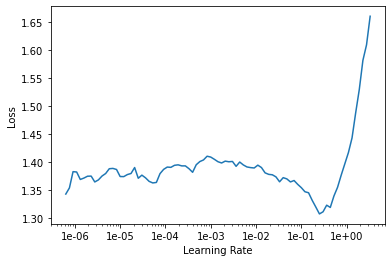

In [19]:
learn = collab_learner(data_train, n_factors=40, y_range=(0.5, 4.0), wd=1e-1)
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

In [20]:
learn.fit_one_cycle(5, 1)

epoch,train_loss,valid_loss,time
0,2.537781,#na#,00:05
1,2.598903,#na#,00:05
2,2.509420,#na#,00:05
3,1.846228,#na#,00:05
4,0.736622,#na#,00:05


In [ ]:
# uids_test = torch.tensor(df_test.iloc[:64,0].values)
# iids_test = torch.tensor(df_test.iloc[:64,0].values)
# preds= learn.model(uids_test, iids_test)


### Evaluate on test set 

In [ ]:
df_test

,uid,iid,rating
4789,200,211,4.0
5632,238,7,2.5
14643,601,121,3.0
761,38,213,0.5
4952,204,3,4.0
...,...,...,...
62,3,63,1.5
13320,544,10,3.5
29629,1241,6,1.5
6369,272,832,2.5


In [21]:
data_test = CollabDataBunch.from_df(df_test, seed=2021, valid_pct=0, 
                             user_name='uid', 
                               item_name='iid',
                               rating_name='rating')
# data_test.show_batch(15)
data_test

TabularDataBunch;

Train: LabelList (1024 items)
x: CollabList
uid 169; iid 246; ,uid 208; iid 245; ,uid 227; iid 246; ,uid 1159; iid 10; ,uid 1060; iid 1227; 
y: FloatList
3.0,3.0,3.0,3.5,3.0
Path: .;

Valid: LabelList (0 items)
x: CollabList

y: FloatList

Path: .;

Test: None

In [ ]:
# test_loader = DataLoader(data_test, batch_size=64, num_workers=0, shuffle=False,)
# test_loader

In [29]:
i = 0 
iterator= iter(data_test.train_dl)
all_test_batches  =[]

while True: 
    try:
        print (f'Batch # {i}')
        (uids, iids), ratings =  next(iterator)
        # print (uids)
        i+=1
        all_test_batches.append((uids, iids, ratings))        
    except:
        break

# it returns only complete batches (64) records from train set 
print ('check the amount of all data:', 
       sum([len(test_batch[0].cpu().detach().numpy()) for test_batch in  all_test_batches]))



Batch # 0
Batch # 1
Batch # 2
Batch # 3
Batch # 4
Batch # 5
Batch # 6
Batch # 7
Batch # 8
Batch # 9
Batch # 10
Batch # 11
Batch # 12
Batch # 13
Batch # 14
Batch # 15
Batch # 16
check the amount of all data: 1024


In [30]:
all_test_batches[0]

(tensor([427, 561, 456,  74, 142, 351, 468,  45,  24, 183, 346, 396, 464, 569,
          97, 164,  61, 377, 169, 218, 166, 354, 490, 109, 473, 128, 369, 129,
          60, 403, 333,  13, 219, 508, 459, 417, 473, 376, 362, 248,  94, 221,
         340, 112, 257, 341, 103, 424,  19,  54, 201, 369, 131, 264, 592,   1,
         249, 384, 176, 165, 330,  50, 306, 282], device='cuda:0'),
 tensor([125,   5,  72,  43,   1,  12,  36,   2,  20,  10,  54,  70,   9,   8,
          49,  51, 148,  53,  51,   5,  44,  68,  54,  47, 226,  13,  54,  59,
         141,  60,   1,  46,  15,  10,  54,   5, 224,   1,  48,   5,  15,   7,
         121,  12,   9,  10,  11,  10,  71,  44,   9,  55,  15,   1,   7,  26,
          11,  66,  25,  43, 200,  53,  60,   2], device='cuda:0'),
 tensor([1.0000, 4.0000, 3.0000, 4.0000, 4.0000, 4.0000, 1.0000, 4.0000, 4.0000,
         1.0000, 2.5000, 3.0000, 4.0000, 4.0000, 3.5000, 4.0000, 3.5000, 3.0000,
         2.0000, 2.5000, 2.0000, 4.0000, 4.0000, 1.0000, 2.5000, 3.000

In [31]:
df_test_pred= pd.DataFrame()
for test_batch in  all_test_batches:     
    preds= learn.model(test_batch[0], test_batch[1])
    df_pred = pd.DataFrame([
        test_batch[0].cpu().detach().numpy(),
        test_batch[1].cpu().detach().numpy(),
        test_batch[2].cpu().detach().numpy(),
        preds.cpu().detach().numpy()]).T

    df_test_pred = df_test_pred.append(df_pred)
df_test_pred.columns = ['uid','iid','rating','rating_pred']
df_test_pred

,uid,iid,rating,rating_pred
0,427.0,125.0,1.0,2.452118
1,561.0,5.0,4.0,3.255534
2,456.0,72.0,3.0,2.358651
3,74.0,43.0,4.0,2.539146
4,142.0,1.0,4.0,3.353830
...,...,...,...,...
59,550.0,7.0,1.0,3.354504
60,331.0,203.0,3.5,1.621077
61,169.0,60.0,3.5,2.039273
62,500.0,1.0,3.0,2.567632


r2_score= -0.1484665133689791
mean error = 0.8335236481257847, max error = 2.318781852722168


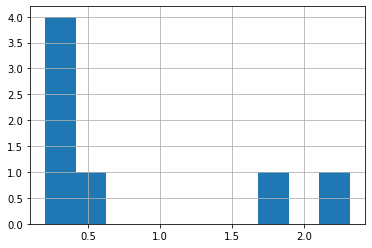

In [34]:
from sklearn.metrics import r2_score
df_eval = df_test_pred
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()